#### Genral
Two parameter bifurcation diagram for the network dynamics to visualize the parameter regions where the master stability function returns a positive eigenvalue and Turing pattern occur.

In [1]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt

In [2]:
# conditions for saddle node bifurcations considering one patch in isolation
def one_patch_bifurcation(beta_eval, M_eval, mu_x_eval, mu_y_eval): # Appendix B
    # symbols
    x, a, b, c, m, p, q, k = sp.symbols('x, a, b, c, m, p, q, k')
    # System
    x_dot = -a*x + b*(m-x) + c*x**2*(m-x) - c*x*(m-x)**2
    # Condition 1: Fix Point
    condition_1 = sp.solve(x_dot, a)[0]
    # Condition 2, solve derivative for 0
    condition_2 = sp.diff(condition_1, x)
    condition_2 = sp.solve(condition_2, c)[0]
    # Resubstitue condition 2 in condition 1
    condition_1 = condition_1.subs(c, condition_2)
    # Substitute fixed parameter values
    cond_1_eval = condition_1.subs({b: beta_eval, m:M_eval, p:mu_x_eval, q:mu_y_eval})
    cond_2_eval = condition_2.subs({b: beta_eval, m:M_eval, p:mu_x_eval, q:mu_y_eval})
    # Turn into numpy function
    cond_alpha = sp.lambdify((x), cond_1_eval, modules='numpy')
    cond_gamma = sp.lambdify((x), cond_2_eval, modules='numpy')
    # Iterate over x to find solutions
    x_space = np.linspace(0.0, M_eval, 1000)
    a = []
    c = []
    for x in x_space:
        a_ = cond_alpha(x)
        c_ = cond_gamma(x)
        if (a_ >= 0 and c_ >= 0):
            a.append(a_)
            c.append(c_)
    one_patch_a = np.array(a)
    one_patch_c = np.array(c)

    return one_patch_a, one_patch_c

In [3]:
# condition for turing bifurcation considering multiple patches
def multi_patch_bifurcation(beta_eval, M_eval, mu_x_eval, mu_y_eval, kappa_eval): # Appendix D
    # symbols
    x, a, b, c, m, p, q, k = sp.symbols('x, a, b, c, m, p, q, k')
    # Condition 1 for fixpoint
    x_dot = -a*x + b*(m-x) + c*x**2*(m-x) - c*x*(m-x)**2
    # solve for alpha
    cond_1 = sp.solve(x_dot, a)[0]
    # Condition 2 - determinant at 0
    # Define determinant
    P11 = -a + 2*c*x*(m-x) - c*(m-x)**2
    P12 = b - 2*c*x*(m-x) + c*x**2
    P21 = a - 2*c*x*(m-x) + c*(m-x)**2
    P22 = -b + 2*c*x*(m-x) - c*x**2
    det = (P11-k*p) * (P22-k*q) - P12*P21
    # Substitute condition 1 into determinant
    cond_2 = det.subs(a, cond_1)
    # Solve for gamma
    cond_2_ = sp.solve(cond_2, c)[0]
    # Resubstitue condition 2 into condition 1
    cond_1_ = cond_1.subs(c, cond_2_)
    cond_1_eval = cond_1_.subs({b: beta_eval, m:M_eval, p:mu_x_eval, q:mu_y_eval, k:kappa_eval})
    cond_2_eval = cond_2_.subs({b: beta_eval, m:M_eval, p:mu_x_eval, q:mu_y_eval, k:kappa_eval})
    # Turn into numpy function
    cond_alpha = sp.lambdify((x), cond_1_eval, modules='numpy')
    cond_gamma = sp.lambdify((x), cond_2_eval, modules='numpy')
    
    # iterate over x
    x_min = 0
    x_max = M_eval
    x_space = np.linspace(x_min, x_max, 1000)
    a = []
    c = []
    for x in x_space:
        a_ = cond_alpha(x)
        c_ = cond_gamma(x)
        if (a_ >= 0 and c_ >= 0):
            a.append(a_)
            c.append(c_)
    multi_patch_a = np.array(a)
    multi_patch_c = np.array(c)

    return multi_patch_a, multi_patch_c

In [4]:
# Parameters
beta_eval = 0.6
M_eval = 15
mu_x_eval = 15
mu_y_eval = 1
kappa_vals = np.linspace(0.05,1,5)

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -0.6 - 9.0/(45 - 4*x) + 9.0/x + 135.0/(x*(45 - 4*x)) - 9.0*(15 - x)**2/(x**2*(45 - 4*x))
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return -0.6 - 9.0/(45 - 4*x) + 9.0/x + 135.0/(x*(45 - 4*x)) - 9.0*(15 - x)**2/(x**2*(45 - 4*x))
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 9.0/(x**2*(45 - 4*x))
<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -(135.0 - 7.65*x)/(255 - 18*x) - 0.6 + 15*(135.0 - 7.65*x)/(x*(255 - 18*x)) + 9.0/x - (15 - x)**2*(135.0 - 7.65*x)/(x**2*(255 - 18*x))
<lambdifygenerated-3>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return -(135.0 - 7.65*x)/(255 - 18*x) - 0.6 + 15*(135.0 - 7.65*x)/(x*(255 - 18*x)) + 9.0/x - (15 - x)**2*(135.0 - 7.65*x)/(x**2*(255 - 18*x))
<lambdifygenerated-4>:2: RuntimeWarning: divide by zero en

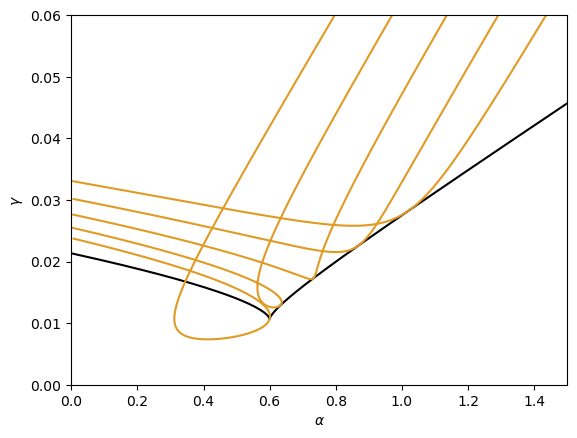

In [5]:
#  Plot
# find one patch bifurcation
one_patch_a, one_patch_c = one_patch_bifurcation(beta_eval, M_eval, mu_x_eval, mu_y_eval)
# plot saddle node patch bifurcation
plt.plot(one_patch_a, one_patch_c, markersize=4, linestyle='-', label="Saddle-Node", color="black")
# plot turing bifurcations for different kappa
for idx,kappa_eval in enumerate(kappa_vals):
    multi_patch_a_b, multi_patch_c_b = multi_patch_bifurcation(beta_eval, M_eval, mu_y_eval, mu_x_eval, kappa_eval)
    plt.plot(multi_patch_a_b, multi_patch_c_b, markersize=4, linestyle='-', color="#e09b24")

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\gamma$")
plt.ylim([0.0,0.06])
plt.xlim([0.0,1.5])
plt.show()